## Overview

1. [Single Cell Model](#single-cell-model)
2. [Network Simulations](#network-simulations)
3. [Fit of the Transfer Function (to do)](#fit-of-the-transfer-function)
4. [Mean Field Model](#mean-field-model)
5. [Whole Brain Model](#whole-brain-model)
6. [PCI](#pci)
7. [BOLD and FC](#bold-and-fc)
8. [Dynamical Analysis (to do)](#dynamical-analysis)

In [315]:
%matplotlib widget

In [5]:
%precision 2
%load_ext autoreload
%autoreload 2

In [6]:
%run setup.py

Everything is now installed. You can proceed. 


<a class="anchor" id="single-cell-model"></a>
### Single Cell Model

In this implementations we select the **AdEx model**, described as following: 


$c_{m}  \frac{dv}{dt}  =  g_L(E_L-v)+ g_L\Delta e^{\frac{v-v_{thr}}{\Delta }} -W + I_{syn}$  

$\frac{dW}{dt}  =  -\frac{1}{\tau_w} (a(v-E_L) - W) + b \sum_{t_{sp}}\delta(t-t_{sp})$

These equations are used in the `eqs` variable of the Brian implementation.

You can select a different model and adjust the `eqs` and the relevant parameters of the model accordingly.

In [103]:
#These are the arguments and default values - to try different parameters refer to the script
%run single_cell_sim.py --help

usage: single_cell_sim.py [-h] [--b_e B_E] [--iext IEXT] [--tau_e TAU_E]
                          [--tau_i TAU_I] [--time TIME]

optional arguments:
  -h, --help     show this help message and exit
  --b_e B_E      adaptation (pA) (default: 60)
  --iext IEXT    input current (nA) (default: 0.3)
  --tau_e TAU_E  excitatory synaptic decay (ms) (default: 5.0)
  --tau_i TAU_I  inhibitory synaptic decay (ms) (default: 5.0)
  --time TIME    Total Time of simulation (ms) (default: 200)


Simulation of a single neuron. In this case we simulate the activity of a regular spiking cell, with adaptation.

8.0


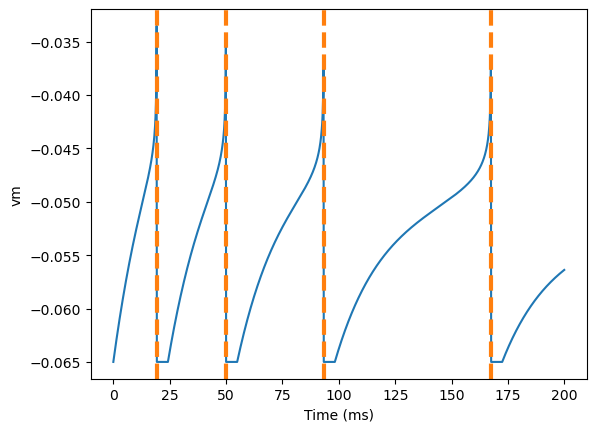

In [8]:
%run single_cell_sim.py --type='RS'

<a id="network-simulations"></a>
### Network Simulations

In [117]:
#These are the arguments and default values - for more changes go to the script
%run adex_simulation_network.py --help

usage: adex_simulation_network.py [-h] [--cells CELLS] [--b_e B_E]
                                  [--tau_e TAU_E] [--tau_i TAU_I]
                                  [--use_new USE_NEW] [--iext IEXT]
                                  [--input INPUT] [--time TIME]
                                  [--save_path SAVE_PATH]

options:
  -h, --help            show this help message and exit
  --cells CELLS         cell types of the populations (default: FS-RS)
  --b_e B_E             adaptation (pA) (default: 0.0)
  --tau_e TAU_E         excitatory synaptic decay (ms) (default: 5.0)
  --tau_i TAU_I         inhibitory synaptic decay (ms) (default: 5.0)
  --use_new USE_NEW     use input parameters - if False: will use the ones in
                        params file (default: False)
  --iext IEXT           external input (Hz) (default: 0.5)
  --input INPUT         Stable input amplitude (Hz) (default: 0)
  --time TIME           Total Time of simulation (ms) (default: 1000)
  --save_path SAVE_P

cell parameters --NOT-- in SI units
b_e=  0.0 plat= 100
Input = 1.0
--##Start simulation##--
--##End simulation##--
Exc= 5.179625 Inh= 11.8205


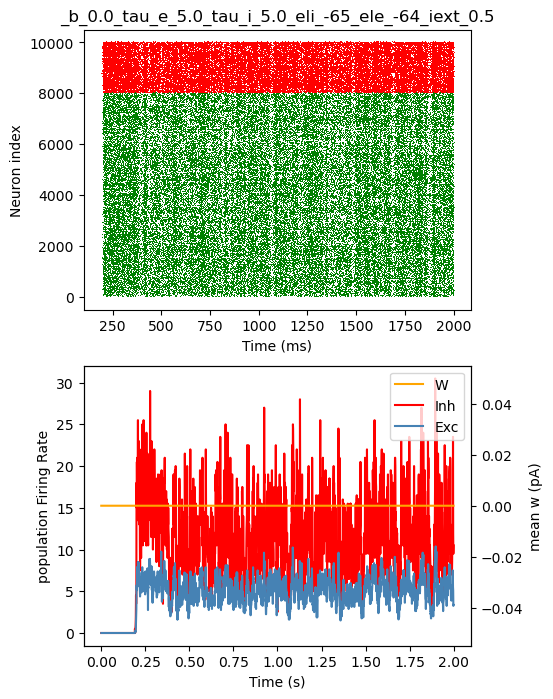

 done


In [183]:
%run adex_simulation_network.py --time 2000 --b_e 0 --use_new True --input 1 --save_path './autocor/'

In [107]:
import subprocess

# Define a list of input values
input_values = [0.5, 2.5, 5, 7.5, 10, 15, 20, 25]

# Loop through the input values and run the script with each value
for input_value in input_values:
    command = f"python adex_simulation_network.py --cells FS-RS --input {input_value} --time 2000 --save_path ./net_compar/ "
    subprocess.run(command, shell=True)


WARNING    /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-05-13 15:39:51,055 - WARNING - py.warnings - /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)

cell parameters --NOT-- in SI units
b_e=  30 plat= 1780.0
Input = 0.5
--##Start simulation##--
--##End simulation##--
Saving the mean
Figure(500x800)
 done


WARNING    /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-05-13 15:40:05,427 - WARNING - py.warnings - /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)

cell parameters --NOT-- in SI units
b_e=  30 plat= 1780.0
Input = 2.5
--##Start simulation##--
--##End simulation##--
Saving the mean
Figure(500x800)
 done


WARNING    /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-05-13 15:40:20,487 - WARNING - py.warnings - /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)

cell parameters --NOT-- in SI units
b_e=  30 plat= 1780.0
Input = 5.0
--##Start simulation##--
--##End simulation##--
Saving the mean
Figure(500x800)
 done


WARNING    /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-05-13 15:40:35,623 - WARNING - py.warnings - /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)

cell parameters --NOT-- in SI units
b_e=  30 plat= 1780.0
Input = 7.5
--##Start simulation##--
--##End simulation##--
Saving the mean
Figure(500x800)
 done


WARNING    /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-05-13 15:40:51,371 - WARNING - py.warnings - /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)

cell parameters --NOT-- in SI units
b_e=  30 plat= 1780.0
Input = 10.0
--##Start simulation##--
--##End simulation##--
Saving the mean
Figure(500x800)
 done


WARNING    /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-05-13 15:41:07,644 - WARNING - py.warnings - /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)

cell parameters --NOT-- in SI units
b_e=  30 plat= 1780.0
Input = 15.0
--##Start simulation##--
--##End simulation##--
Saving the mean
Figure(500x800)
 done


WARNING    /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-05-13 15:41:24,335 - WARNING - py.warnings - /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)

cell parameters --NOT-- in SI units
b_e=  30 plat= 1780.0
Input = 20.0
--##Start simulation##--
--##End simulation##--
Saving the mean
Figure(500x800)
 done


WARNING    /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-05-13 15:41:40,856 - WARNING - py.warnings - /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)

cell parameters --NOT-- in SI units
b_e=  30 plat= 1780.0
Input = 25.0
--##Start simulation##--
--##End simulation##--
Saving the mean
Figure(500x800)
 done


cell parameters --NOT-- in SI units
Input = 1.0
--##Start simulation##--
--##End simulation##--


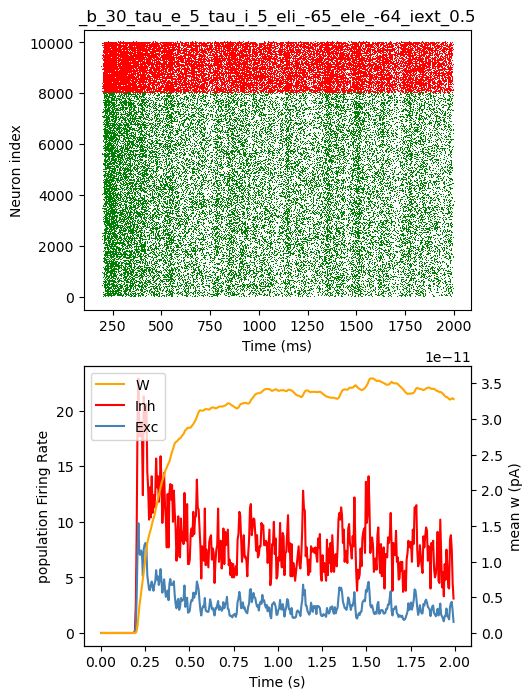

 done


In [119]:
%run adex_simulation_network.py --input 1 --time 2000

In [3]:
# Now making the numerical simulations at various levels of both excitatory and inhibitory inputs
%run Tf_calc/tf_simulation_single_cell.py --cells RS --range_inh 0.1,15,30 --range_exc 0.1,15,30 --time 2000 --save_name b_e_10_jump
# paper's value -> 5-10 minutes sim

cell parameters --NOT-- in SI units
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
== the excitation level : 2  over  30
== ---- the inhibition level : 1  over  30
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
== the excitation level : 3  over  30
== ---- the inhibition level : 1  over  30
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
== the excitation level : 4  over  30
== ---- the inhibition level : 1  over  30
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
== the excitation level : 5  over  30
== ---- the inhibition level : 1  over  30
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
we rescale the fe vector [...]
rate inh = 0.1
== the excitation level : 6  over  30
== ---- the inhibitio

In [88]:
file = './data/ExpTF_exc_50x50_b_e_10.npy'
cell = 'RS'
param_file = './data/params_range_50x50_trial.npy'

feSim, fiSim, params = np.load(param_file,allow_pickle=True) 
params

{'V_m': -60,
 'V_r': -65,
 'Cm': 200,
 'Gl': 10,
 'tau_w': 500,
 'V_th': -50,
 'V_cut': -30,
 'a_e': 0,
 'b_e': 30,
 'delta_e': 2,
 'EL_e': -64,
 'a_i': 0,
 'b_i': 0,
 'delta_i': 0.50,
 'EL_i': -65,
 'tau_e': 5,
 'tau_i': 5,
 'E_e': 0,
 'E_i': -80,
 'Q_i': 5.00,
 'Q_e': 1.50,
 'p_con': 0.05,
 'gei': 0.20,
 'Ntot': 10000}

In [323]:
cell = 'RS'
pts = 50
save_name = 'trial'
# cell_sm = 'inh'

file = f'./data/ExpTF_{pts}x{pts}_{save_name}_{cell}.npy'
param_file = f"./data/{pts}x{pts}_{save_name}_{cell}_params.npy"
adapt_file= f"./data/{pts}x{pts}_{save_name}_{cell}_adapt.npy"

feSim, fiSim, params = np.load(param_file,allow_pickle=True) 
adapt = np.load(adapt_file)
out_rate = np.load(file)

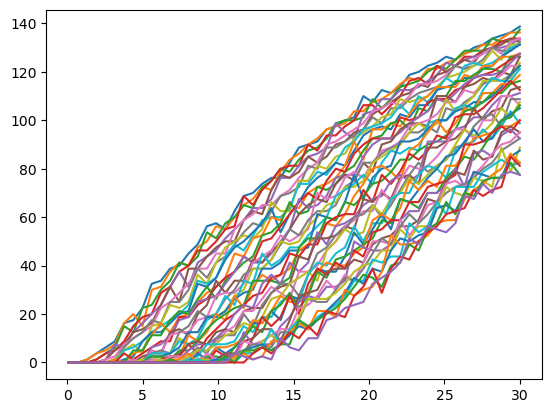

In [324]:
n=60
plt.plot(feSim[:n], out_rate[:n, 5:60]);

In [116]:
adapt[:25,:25]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.40598116e-11, 0.00000000e+00, 1.38599177e-12, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.19530072e-11, 5.17642887e-11, 2.21292149e-11, 1.81746580e-11,
        6.8699

In [69]:
feSim[:25]

array([ 0.1       ,  0.71020408,  1.32040816,  1.93061224,  2.54081633,
        3.15102041,  3.76122449,  4.37142857,  4.98163265,  5.59183673,
        6.20204082,  6.8122449 ,  7.42244898,  8.03265306,  8.64285714,
        9.25306122,  9.86326531, 10.47346939, 11.08367347, 11.69387755,
       12.30408163, 12.91428571, 13.5244898 , 14.13469388, 14.74489796])

In [184]:
fiSim.shape

(30,)

In [294]:
out_rate_2 = out_rate[:n, 20:]
adapt_2 = adapt[:n, 20:]
feSim_2 = feSim[:n]
fiSim_2 = fiSim[20:]

In [295]:
save_name = 'trial_short'
param_2 = np.array([feSim_2, fiSim_2,params],dtype='object')
np.save(f'./data/{pts}x{pts}_{save_name}_{cell}_params.npy', param_2)

In [296]:
save_name = 'trial_short'
np.save(f'data/ExpTF_{pts}x{pts}_{save_name}_{cell}.npy',out_rate_2)
np.save(f'data/{pts}x{pts}_{save_name}_{cell}_adapt.npy',adapt_2)


In [171]:
out_rate_2.shape

(40, 30)

In [53]:
file = './data/ExpTF_inh_50x50_trial.npy'
cell = 'FS'
param_file = './data/params_range_trial.npy'
adapt_file= "./data/ExpTF_Adapt_inh_50x50_trial.npy"

In [8]:
save_name = 'trial'
cell = 'FS'
pts = 50

file = f'./data/ExpTF_{pts}x{pts}_{save_name}_{cell}.npy'
param_file = f'./data/{pts}x{pts}_{save_name}_{cell}_params.npy'
adapt_file= f"./data/{pts}x{pts}_{save_name}_{cell}_adapt.npy"

In [381]:
from Tf_calc.theoretical_tools import  make_fit_from_data_fede

save_name = 'trial'
cell = 'FS'
pts = 50

file = f'./data/ExpTF_{pts}x{pts}_{save_name}_{cell}.npy'
param_file = f'./data/{pts}x{pts}_{save_name}_{cell}_params.npy'
adapt_file= f"./data/{pts}x{pts}_{save_name}_{cell}_adapt.npy"


P = make_fit_from_data_fede(file, cell, param_file, adapt_file,range_exc=None, \
range_inh=None, window=15, loop_n=1, w_prec=True, seed=30, tf_tol=1e-15)
# make_fit_from_data_2(file, cell, param_file, with_square_terms=True)

(2500,) (2500,) (2500,) (2500,)
(2500,)
(2500,)
this many nans: 1391
(1109,)
(1109,)
fitting first order V threshold..
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.637639098450529e-07
            Iterations: 82
            Function evaluations: 916
            Gradient evaluations: 82
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.637639093288161e-07
            Iterations: 83
            Function evaluations: 927
            Gradient evaluations: 83
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.6376391353114924e-07
            Iterations: 85
            Function evaluations: 937
            Gradient evaluations: 85
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.637639086670745e-07
            Iterations: 81
            Function evaluations: 905
            Gradient evaluations: 81
Optimization terminated 

WARNING    /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:814: OptimizeWarning: Unknown solver options: seed
  # fit2 = minimize(res2_func, params_init2,
 [py.warnings]


Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.6376391145769835e-07
            Iterations: 86
            Function evaluations: 959
            Gradient evaluations: 86
P =  [-0.05090402  0.00221758  0.01391156 -0.00221181  0.00018691  0.01516617
  0.00876624 -0.00768871  0.00170071  0.00747754]
Fitting Transfer Function..
loop n: 0
2024-05-13 20:20:29,472 - WARNING - py.warnings - /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:814: OptimizeWarning: Unknown solver options: seed
  # fit2 = minimize(res2_func, params_init2,



WARNING    /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:814: RuntimeWarning: Maximum number of iterations has been exceeded.
  # fit2 = minimize(res2_func, params_init2,
 [py.warnings]


2024-05-13 20:21:13,703 - WARNING - py.warnings - /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:814: RuntimeWarning: Maximum number of iterations has been exceeded.
  # fit2 = minimize(res2_func, params_init2,

(50, 50)
(50, 50)
coefficients saved in  ./data/50x50_trial_FS_fit.npy


(50, 50)
(50, 50)


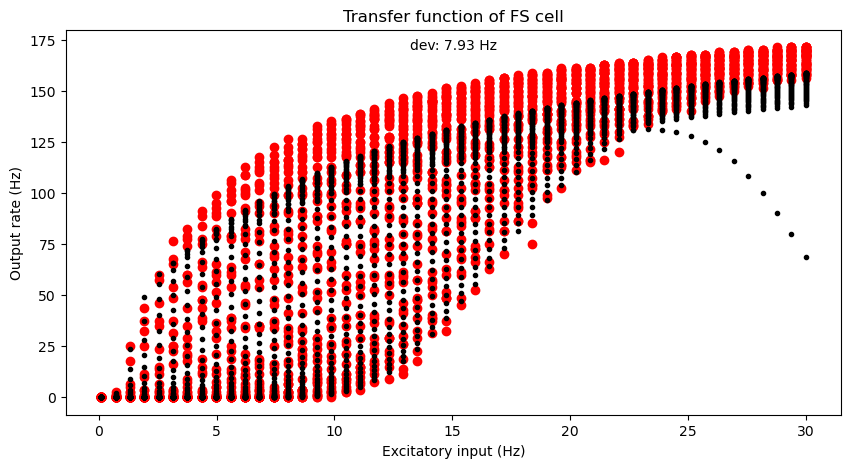

In [382]:
cell = 'FS'
pts = 50
save_name = 'trial'
# cell_sm = 'inh'
file = f'./data/ExpTF_{pts}x{pts}_{save_name}_{cell}.npy'

adapt_file= f"./data/{pts}x{pts}_{save_name}_{cell}_adapt.npy"
file_fit =f"./data/{pts}x{pts}_{save_name}_{cell}_fit.npy"
# file_fit ='FS-cell_CONFIG1_fit.npy'

P = np.load(file_fit)
plot_check_fit(file, param_file, adapt_file ,cell, P, w_prec=True)

In [96]:
adapt_2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

[-0.04902934 -0.00073961  0.0081333  -0.01769336  0.00230629 -0.00251581
  0.02610268 -0.00144456  0.01277736  0.01178271]
cell parameters in SI units


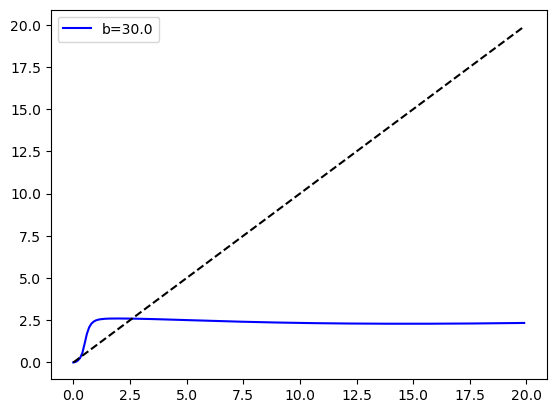

solution =  [2.59717325]
solution nui_fix =  [[6.03717145]]


In [384]:
file_fs= 'FS-cell_CONFIG1_fit.npy'
file_fs= "./data/{0}x{1}_{2}_{3}_fit.npy".format(50,50, 'trial', 'FS' )
file_rs ='RS-cell0_CONFIG1_fit.npy'
pts=50
save_name = 'trial'
cell='RS'
file_rs =f"./data/{pts}x{pts}_{save_name}_{cell}_fit.npy"


plot_curve(NAME = 'FS-RS', file_rs =file_rs, file_fs= file_fs, 
               use_new=True, b_e=30e-12)

In [385]:
CELLS = 'FS-RS_b_0'
path_net = "./net_compar/"
fr_both, inputs = load_network_mean(CELLS, path_net)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [363]:
fr_both

array([[ 4.2475  ,  1.5105  ,  0.5     ],
       [12.7825  ,  3.174625,  2.5     ],
       [19.7845  ,  4.03725 ,  5.      ],
       [25.7755  ,  4.585   ,  7.5     ],
       [31.231   ,  4.941625, 10.      ],
       [41.3665  ,  5.51775 , 15.      ],
       [50.8095  ,  5.8655  , 20.      ],
       [59.98    ,  6.24375 , 25.      ]])

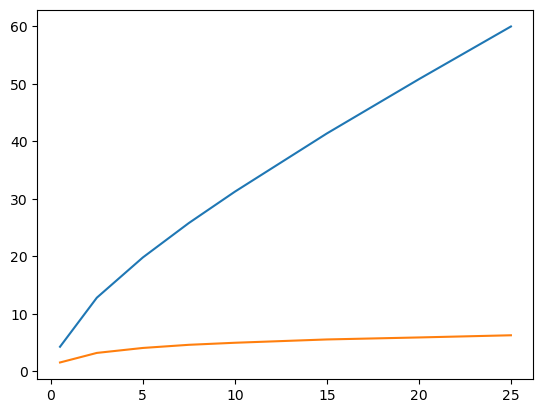

In [362]:
plt.plot(inputs, fr_both[:,:2]);

In [351]:
inputs

array([ 0.5,  2.5,  5. ,  7.5, 10. , 15. , 20. , 25. ])

In [356]:
PRS = np.load(file_rs)
PFS = np.load(file_fs)
# PFS = np.load("FS-cell_CONFIG1_fit.npy")
# PRS = np.load("RS-cell0_CONFIG1_fit.npy")

calculate_mf_difference(CELLS, fr_both, inputs, PRS, PFS)

cell parameters in SI units
Input =  0.5
starting
cell parameters in SI units
Input =  2.5
starting
cell parameters in SI units
Input =  5.0
starting
cell parameters in SI units
Input =  7.5
starting
cell parameters in SI units
Input =  10.0
starting
cell parameters in SI units
Input =  15.0
starting
cell parameters in SI units
Input =  20.0
starting
cell parameters in SI units
Input =  25.0
starting
Whole difference:  [[  9.79995096   1.5105       0.5       ]
 [  1.35736775   2.71133486   2.5       ]
 [  4.97130889   3.53051632   5.        ]
 [ 10.27374802   4.00802396   7.5       ]
 [ 15.02458693   4.2665763   10.        ]
 [151.41798374 184.94779087  15.        ]
 [141.98657873 184.6301421   20.        ]
 [132.82722837 184.27576549  25.        ]]
mean difference exc:  71.23508123824995
mean difference inh:  58.45734417359796


64.84621270592396

In [19]:
def load_network_mean(CELLS, path_net):
        #load network
    fr_inh=[]
    fr_exc=[]
    for file in os.listdir(path_net):
        if file.startswith(CELLS):
            if "inh" in file:
                mean_fr, amp, _ = np.load(path_net+file, allow_pickle=True)
                fr_inh.append([mean_fr, amp])
            elif "exc" in file:
                mean_fr, amp, _ = np.load(path_net+file, allow_pickle=True)
                fr_exc.append([mean_fr, amp])
    fr_exc = np.array(sorted(fr_exc, key=lambda x: x[1]))
    fr_inh = np.array(sorted(fr_inh, key=lambda x: x[1]))
    fr_both = np.column_stack((fr_inh[:,0], fr_exc ))
    
    inputs = fr_both[:,-1]

    return fr_both, inputs

def calculate_mf_difference(CELLS, fr_both, inputs, PRS, PFS):
    mean_both =[]
    for AmpStim in inputs:
        mean_exc, mean_inh = run_MF(CELLS, AmpStim, PRS, PFS, Iext=0, TotTime=2)
        mean_both.append([mean_inh, mean_exc, AmpStim])

    dif_arr = np.abs(fr_both - np.array(mean_both))

    if dif_arr[:,-1].any() !=0:
        raise Exception("difference of inputs should be 0 but it is not")

    print("Whole difference: ", dif_arr)
    print("mean difference exc: ", np.mean(dif_arr[:,1]))
    print("mean difference inh: ", np.mean(dif_arr[:,0]))
    
    dif = np.mean(dif_arr[:,:2])

    return dif 

In [368]:
from Tf_calc.theoretical_tools import fit_with_MF

save_name = 'trial'
cell = 'FS'
cell_sm = 'inh'

file = f'./data/ExpTF_{cell_sm}_fr_50x50_{save_name}.npy'
param_file = f'./data/params_range_50x50_{save_name}.npy'
adapt_file= f"./data/ExpTF_RS_adapt_50x50_{save_name}.npy"

file = f'./data/ExpTF_{cell_sm}_50x50_{save_name}.npy'
param_file = f'./data/params_range_50x50_{save_name}.npy'
adapt_file= f"./data/ExpTF_Adapt_inh_50x50_trial.npy"

CELLS = 'FS-RS'
fit_with_MF(file, CELLS, param_file, adapt_file,max_iter = 30, dif = 5, range_exc=None, range_inh=None, window=15, loop_n=1, w_prec=True,  path_net= "./net_compar/")
    

FileNotFoundError: [Errno 2] No such file or directory: './data/ExpTF_inh_50x50_trial.npy'

In [28]:
file.split('.')[1]

'/data/ExpTF_exc_50x50_b_e_10'

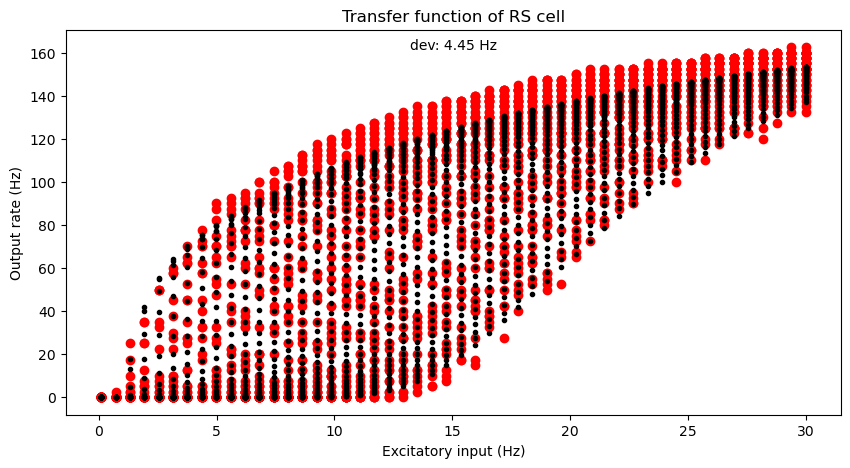

In [39]:
cell_type='FS'
file = './data/ExpTF_exc_50x50_b_e_10.npy'
file = './data/ExpTF_RS_fr_50x50_b_e_0.npy'

file_p = file.split('.npy')[0] + f'_{cell_type}__fit.npy'

param_file = './data/RS_params_range_50x50_b_e_10.npy'
param_file = './data/RS_params_range_50x50_b_e_0.npy'

adapt_file = './data/ExpTF_Adapt_50x50_b_e_10.npy'
adapt_file = './data/ExpTF_RS_adapt_50x50_b_e_0.npy'
P = np.load(file_p)

# P=np.load(f'./data/ExpTF_inh_50x50_trial_{cell_type}__fit.npy')
# P =np.load('RS-cell0_CONFIG1_fit_2.npy')

# P = np.load('FS-cell_CONFIG1_fit_2.npy')
plot_check_fit(file, param_file, adapt_file ,cell_type, P)

In [367]:
file_rs ="./data/ExpTF_exc_50x50_trial_RS__fit.npy"
file_fs="./data/ExpTF_inh_50x50_trial_FS__fit.npy"
# PRS = np.load('./data/ExpTF_exc_50x50_trial_RS__fit.npy')

# file_rs = "./data/ExpTF_RS_fr_50x50_b_e_0_RS__fit.npy"

# file_fs="FS-cell_CONFIG1_fit_2.npy"
# file_rs="RS-cell0_CONFIG1_fit_2.npy"

plot_curve( file_fs=file_fs, file_rs = file_rs, use_new=True, b_e=60*1e-12)


FileNotFoundError: [Errno 2] No such file or directory: './data/ExpTF_exc_50x50_trial_RS__fit.npy'

In [344]:
%run MF_script_with_OS.py --help

usage: MF_script_with_OS.py [-h] [--cells CELLS] [--b_e B_E] [--iext IEXT]
                            [--tau_e TAU_E] [--tau_i TAU_I]
                            [--use_new USE_NEW] [--time TIME]
                            [--file_fs FILE_FS] [--file_rs FILE_RS]
                            [--input INPUT]

optional arguments:
  -h, --help         show this help message and exit
  --cells CELLS      cell types of the populations
  --b_e B_E          adaptation - in pA
  --iext IEXT        external input - in Hz
  --tau_e TAU_E      excitatory synaptic decay - in ms
  --tau_i TAU_I      inhibitory synaptic decay - in ms
  --use_new USE_NEW  use input parameters - if False: will use the ones in
                     params file
  --time TIME        Total Time of simulation - in s
  --file_fs FILE_FS  fit for fs
  --file_rs FILE_RS  fit for rs
  --input INPUT      Stable input amplitude (Hz)


cell parameters in SI units
plat= 900
starting
done


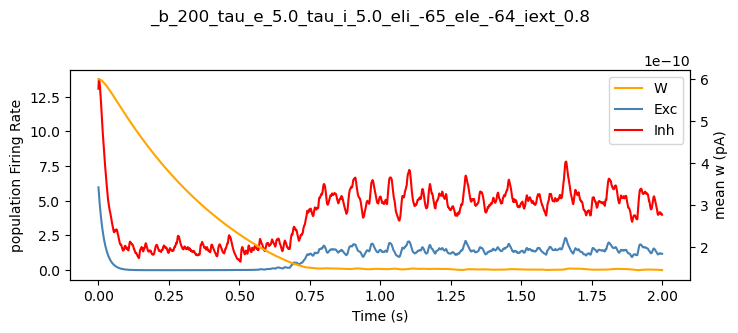

In [54]:
%run MF_script_with_OS.py --b_e=200 --file_fs $file_fs --file_rs $file_rs --iext 0.8 --use_new=True --time 2

cell parameters in SI units
plat= 900
starting
done


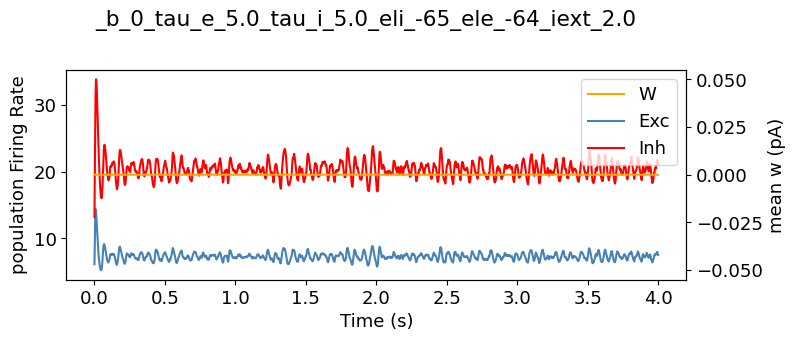

In [ ]:
%run MF_script_with_OS.py --b_e=0 --file_fs $file_fs --file_rs $file_rs --iext=2 --use_new=True --time 4

In [346]:
from Tf_calc.theoretical_tools import *

In [347]:
P = np.load('./data/ExpTF_inh_50x50_trial_FS_fede_fit.npy')
adapt = np.load("./data/ExpTF_Adapt_inh_50x50_trial.npy")
file = './data/ExpTF_inh_50x50_trial.npy'
cell_type = 'FS'
param_file = './data/params_range_trial.npy'

feSim, fiSim, params = np.load(param_file,allow_pickle=True) 

FileNotFoundError: [Errno 2] No such file or directory: './data/ExpTF_inh_50x50_trial_FS_fede_fit.npy'

In [ ]:
x_start

0

In [ ]:
from scipy.ndimage import maximum_filter


mean error =  2.2277421948251015


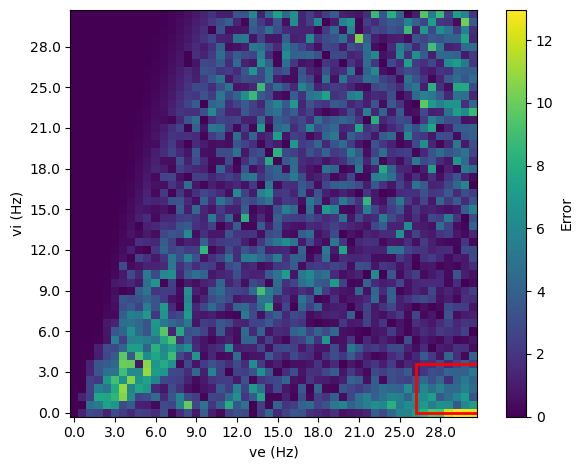

In [ ]:
plot_example_adjust_range(file, param_file, adapt_file ,cell_type, P, window=5)

In [ ]:
def refill_nans(array_original, array_nonan, bigindex):
    array_new = np.zeros_like(array_original.flatten())
    array_new[bigindex] = np.nan

    # array_new = np.empty_like(array_original.flatten())
    # array_new[:] = np.nan
    # array_new[bigindex] = 0

    c=0
    for i in range(len(array_new)):
        if np.isnan(array_new[i]):
            c+=1
            pass
        else:
            array_new[i] = array_nonan.flatten()[i-c]
    
    return array_new.reshape(array_original.shape)

In [ ]:
def reshape_with_nans(vve, vvi, adapt, FF, params, cell_type):
    ve2, vi2, FF2, adapt2, bigindex = get_rid_of_nans(vve, vvi, adapt, FF, params, cell_type, return_index=True)

    vve_new = refill_nans(vve, ve2, bigindex)
    vvi_new = refill_nans(vvi, vi2, bigindex)
    adapt_new = refill_nans(adapt, adapt2, bigindex)
    FF_new = refill_nans(FF, FF2, bigindex)

    # vve_new = refill_nans(vve, vve, bigindex)
    # vvi_new = refill_nans(vvi, vvi, bigindex)
    # adapt_new = refill_nans(adapt, adapt, bigindex)
    # FF_new = refill_nans(FF, FF, bigindex)

    return vve_new, vvi_new, adapt_new, FF_new


In [ ]:
vve_new, vvi_new, adapt_new, FF_new = reshape_with_nans(vve, vvi, adapt, FF, params, cell_type)

this many nans: 405


(2095,)


Text(0.5, 0.95, 'dev: nan Hz')

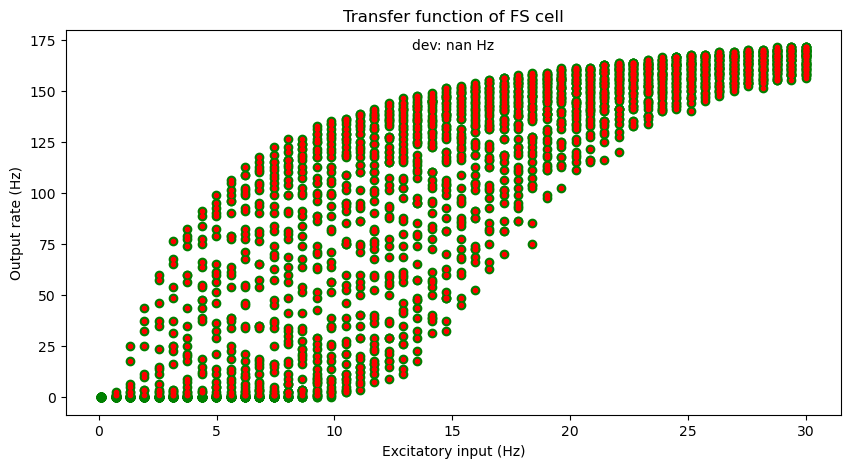

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Transfer function of FS cell')
ax.set_ylabel('Output rate (Hz)')
ax.set_xlabel('Excitatory input (Hz)')
    
inp_exc = feSim
vve, vvi = np.meshgrid(feSim, fiSim)
out_rate = np.load(file)

ve2, vi2, FF2, adapt2 = get_rid_of_nans(vve, vvi, adapt, FF, params, cell_type)

mu_V, sig_V, tau_V = mu_sig_tau_func(vve_new, vvi_new, adapt_new,params,cell_type)
g_L = 10 * 1e-9   # 30.0  /1.3
C_m = 200 * 1e-12  # 281.0 /1.1
tauN_V = tau_V * g_L / C_m

fit_rate = output_rate(P,mu_V, sig_V, tau_V, tauN_V)
# ax.plot(vi, fit_rate, 'k.', label='fit');
ax.plot(ve, FF, 'go', label='data');
ax.plot(ve, FF_new, 'r.', label='data');

mean_error = np.mean(np.sqrt((FF_new - fit_rate)**2))

ax.text(0.5, 0.95, f'dev: {mean_error:.2f} Hz', transform=ax.transAxes, ha='center')

In [ ]:
P = np.load('./data/ExpTF_inh_50x50_trial_FS_fede_fit.npy')
adapt = np.load("./data/ExpTF_Adapt_inh_50x50_trial.npy")
adapt_file = "./data/ExpTF_Adapt_inh_50x50_trial.npy"
file = './data/ExpTF_inh_50x50_trial.npy'
cell_type = 'FS'
param_file = './data/params_range_trial.npy'


In [ ]:
des_start = 0
des_end = 30
start = np.argmin(np.abs(vi - des_start))
end = np.argmin(np.abs(vi - des_end))
rid = range(start,end)


des_start = 15
des_end = 30
start = np.argmin(np.abs(ve - des_start))
end = np.argmin(np.abs(ve - des_end))
red = range(start, end)

In [ ]:
desired_value = 10
closest_index = np.argmin(np.abs(vi - desired_value))
closest_index

16

AttributeError: 'Unit' object has no attribute 'jet'

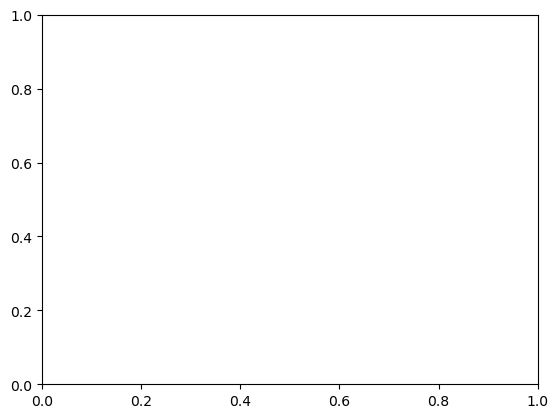

In [34]:
fig, ax = plt.subplots()
colormap = cm.jet
fs=[0,20,40,55,75,90]
index = 2
n_lines = 5
increment = 6

normalize = mcolors.Normalize(vmin=vi[index], vmax=vi[index + n_lines*increment])


for i in range(n_lines):
    # print(vi[index])
    ax.scatter(vve[index], out_rate.T[index], color=colormap(normalize(vi[index])), s=100)
    ax.plot(vve[index].squeeze(), fit_rate.T[index].squeeze(), 'k',  linewidth=3.0, label='fit')

    index+=increment
# ax.set_ylim(0.,50)

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(vi)
plt.colorbar(scalarmappaple, label='FS input (Hz)')
plt.show()

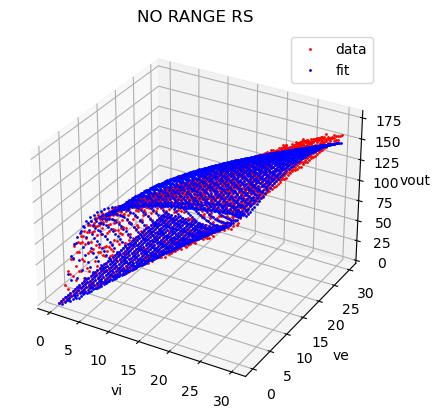

In [ ]:
# Create a new figure
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1, label='FS')
ax.plot3D(vvi.flatten(), vve.flatten(), out_rate.flatten(), 'or', markersize=1, label='data')
ax.plot3D(vvi.flatten(), vve.flatten(), fit_rate.flatten(), 'ob', markersize=1, label='fit')

# Set labels for the axes
ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')

ax.set_title("NO RANGE RS")

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [ ]:
muve_file = "./data/ExpTF_muve_50x50_trial.npy"
muvi_file = "./data/ExpTF_muvi_50x50_trial.npy"
muve = np.load(muve_file)
muvi = np.load(muvi_file)

muvi.shape

(50, 50)

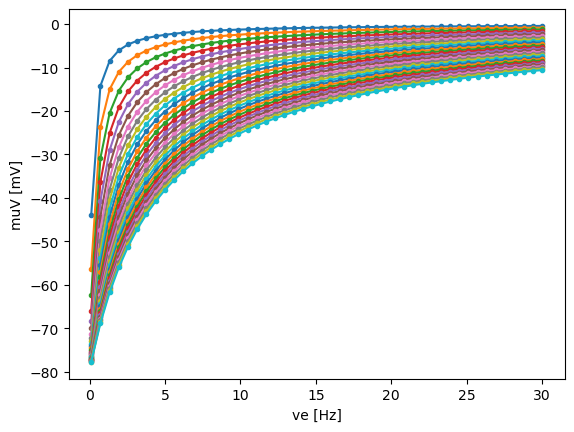

In [ ]:
plot_muv(vve, vvi, adapt,)

In [ ]:
vi = fiSim

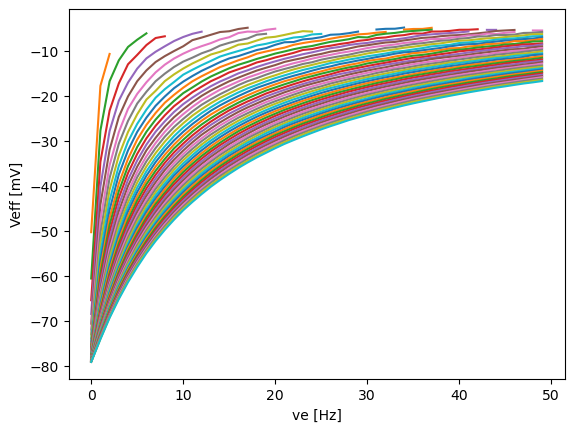

In [ ]:
plot_veff(vve, vvi, adapt, out_rate)

In [ ]:
out_rate.shape

(50, 50)

In [ ]:
adapt_fs = np.zeros_like(adapt)
adapt_fs.shape

(50, 50)

In [ ]:
np.save("./data/ExpTF_Adapt_inh_50x50_trial.npy", adapt_fs)

In [ ]:
ve, vi, params = np.load(param_file,allow_pickle=True)
FF= np.load(file)
PP = np.load('./data/ExpTF_inh_50x50_trial_fit.npy')

muV, sV, Tv, TvN = MPF(vve, vvi, FF, params, cell_type)


In [ ]:
%matplotlib inline

In [ ]:
param_file

'./data/params_range_50x50_b_e_10.npy'

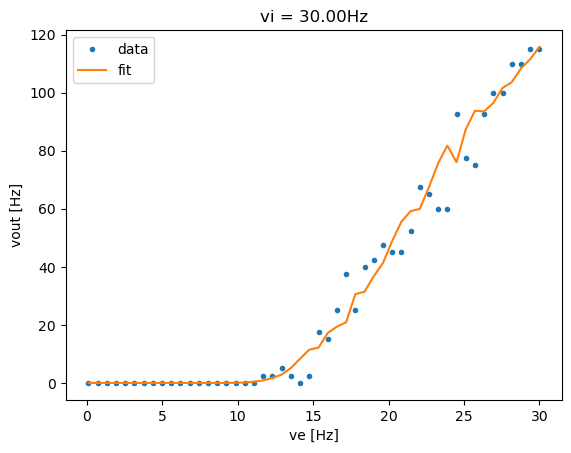

In [33]:
video_check_fit(file, param_file, adapt_file ,cell_type, P)

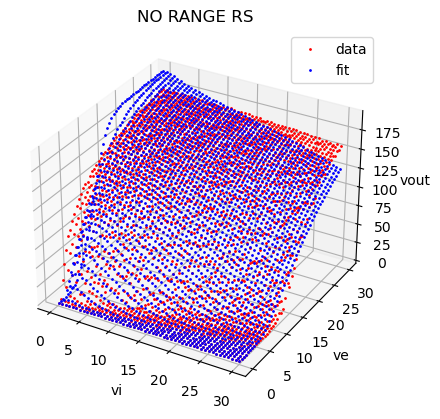

In [ ]:
# Create a new figure
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1, label='FS')
ax.plot3D(vvi.flatten(), vve.flatten(), FF.flatten(), 'or', markersize=1, label='data')
ax.plot3D(vvi.flatten(), vve.flatten(), TF(PP, muV, sV, Tv, TvN).flatten(), 'ob', markersize=1, label='fit')

# Set labels for the axes
ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')

ax.set_title("NO RANGE RS")

# Add a legend
ax.legend()

# Display the plot
plt.show()

<a id="fit-of-the-transfer-function"></a>
### Fit of the Transfer Function (to do)

<a id="mean-field-model"></a>
### Mean Field Model

In [ ]:
from Tf_calc.cell_library import get_neuron_params_double_cell

params = get_neuron_params_double_cell('FS-RS')

params

{'V_m': -60,
 'a_e': 0,
 'a_i': 0,
 'V_r': -65,
 'tau_e': 5,
 'tau_i': 5,
 'b_e': 30,
 'b_i': 0,
 'delta_e': 2,
 'delta_i': 0.50,
 'El_e': -64,
 'El_i': -65,
 'V_th': -50,
 'E_e': 0,
 'E_i': -80,
 'Cm': 200,
 'Gl': 10,
 'tau_w': 500,
 'p_con': 0.05,
 'gei': 0.20,
 'Ntot': 10000,
 'Q_i': 5.00,
 'Q_e': 1.50}

In [ ]:
%run MF_script_with_OS.py --help

usage: MF_script_with_OS.py [-h] [--b_e B_E] [--iext IEXT] [--tau_e TAU_E]
                            [--tau_i TAU_I] [--time TIME]

optional arguments:
  -h, --help     show this help message and exit
  --b_e B_E      adaptation - in pA
  --iext IEXT    external input - in Hz
  --tau_e TAU_E  excitatory synaptic decay - in ms
  --tau_i TAU_I  inhibitory synaptic decay - in ms
  --time TIME    Total Time of simulation - in s


In [ ]:
P[0] ok
P[1] ok 


In [ ]:
PRS=np.load('RS-cell0_CONFIG1_fit.npy')
PFS=np.load('FS-cell_CONFIG1_fit.npy')

PRS

array([-0.05017034,  0.00451531, -0.00794377, -0.00208418,  0.001     ,
       -0.00054697,  0.00341614, -0.01156433,  0.00194753,  0.00274079,
       -0.01066769])

In [ ]:
np.save('RS-cell0_CONFIG1_fit_2.npy', PR2)
np.save('FS-cell_CONFIG1_fit_2.npy', PF2)

In [ ]:

PF2 = np.delete(PFS,4)
PF2

array([-0.05184978,  0.0061593 , -0.01403522,  0.00166511, -0.0020559 ,
        0.00318432, -0.03112775,  0.00656668,  0.00171829, -0.04516385])

In [ ]:
PR2 = np.delete(PRS,4)
PR2

array([-0.05017034,  0.00451531, -0.00794377, -0.00208418, -0.00054697,
        0.00341614, -0.01156433,  0.00194753,  0.00274079, -0.01066769])

In [ ]:
%run MF_script_with_OS.py

starting


IndexError: index 10 is out of bounds for axis 0 with size 10

starting
done


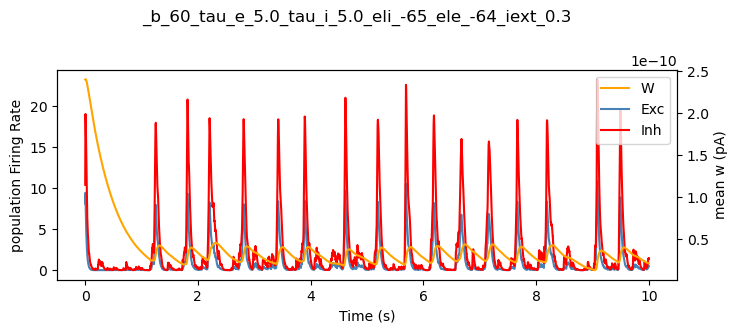

In [ ]:
%run MF_script_with_OS.py --b_e=60

In [ ]:
%run MF_script_with_OS.py --help

usage: MF_script_with_OS.py [-h] [--cells CELLS] [--b_e B_E] [--iext IEXT]
                            [--tau_e TAU_E] [--tau_i TAU_I]
                            [--use_new USE_NEW] [--time TIME]
                            [--fit_fs FIT_FS] [--fit_rs FIT_RS]
                            [--input INPUT]

options:
  -h, --help         show this help message and exit
  --cells CELLS      cell types of the populations
  --b_e B_E          adaptation - in pA
  --iext IEXT        external input - in Hz
  --tau_e TAU_E      excitatory synaptic decay - in ms
  --tau_i TAU_I      inhibitory synaptic decay - in ms
  --use_new USE_NEW  use input parameters - if False: will use the ones in
                     params file
  --time TIME        Total Time of simulation - in s
  --fit_fs FIT_FS    fit for fs
  --fit_rs FIT_RS    fit for rs
  --input INPUT      Stable input amplitude (Hz)


cell parameters in SI units
1.1467448362467498 -0.4260614801390927
starting
done


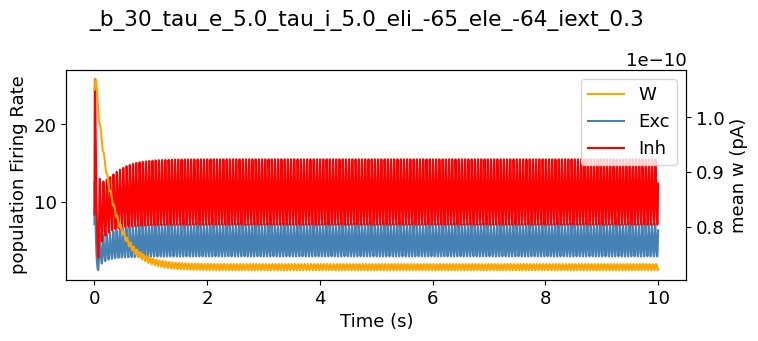

In [ ]:
%run MF_script_with_OS.py --b_e 10 --file_fs ./FS-cell_CONFIG1_fit_2.npy --file_rs ./data/ExpTF_exc_50x50_trial_RS__fit.npy --input 6

1.0562832159870306 -0.4704784270573485 0.2971344034858762
starting
done


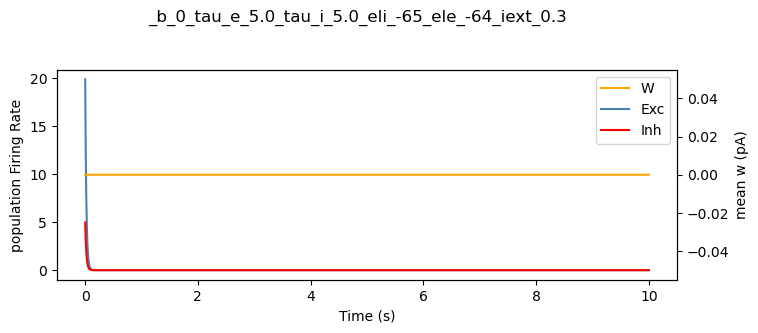

In [ ]:
%run MF_script_with_OS.py --b_e=0 --iext=0.3 

<a id="whole-brain-model"></a>
### Whole Brain Model

#### Choose a connectome 

You have various options:

1. Get a default connectivity from TVB software

    - `parameters.parameter_connection_between_region['default'] = True`

2. Point to a zip folder (required files included in the zip folder: centres, tract_lengths, weights)

    - `parameters.parameter_connection_between_region['from_file'] = True`
    - `parameters.parameter_connection_between_region['path'] = path/to/zip/file`
    - `parameters.parameter_connection_between_region['conn_name'] = 'Connectivity.zip'` (add the actual zip name)

3. Point to an h5 file

    - `parameters.parameter_connection_between_region['path'] = path/to/h5/file CHECK`

4. Point to an unzipped folder that contains necessarily tract_lengths.txt and weights.txt (optional: region_labels, centres, cortical)

    - `parameters.parameter_connection_between_region['path'] = path/to/folder/containing/files`


In [ ]:
# Choose the connectome

path_windows = r"C:\Users\maria\Downloads\tvb_data\tvb_data\connectivity"
path_linux = "/home/maria/Downloads/tvb_data/connectivity"
parameters.parameter_connection_between_region['from_file'] = True
parameters.parameter_connection_between_region['path'] = path_linux
parameters.parameter_connection_between_region['conn_name'] = 'connectivity_76.zip'

##### Set up the parameters of the simulation

In [ ]:
## Set the parameters of the simulation:
run_sim = 2000.0 # ms, length of the simulation
cut_transient = 200.0 # ms, length of the discarded initial segment

# List of values of adaptation strength and tau_e which will vary the brain state
bvals = [5]
tau_es = [3.75]

## Set the parameters of the stimulus (choose stimval = 0 to simulate spontaneous activity)
stimval = 0 #  stimulus strength

In [ ]:
simulator = sim_init(parameters)
Nnodes = simulator.number_of_nodes

2024-04-04 17:14:31,890 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


No differences in  model
No differences in  connectivity
No differences in  coupling
No differences in  integrator
If there are no differences you can safely continue: press Y
Overwriting...


#### Run the simulation


Here is an example of changing `tau_e` and `b_e`.

You can instead change `tau_i`, or other values (look at docs of `adjust_parameters`), by setting `tau_i = desired_value` as an argument in the functions:
- `adjust_parameters`
- `get_result`

and set `change_of = 'tau_i'` in:
- `access_results`
- `plot_tvb_results`



In [ ]:
# Choose values of b_e and tau_e
bvals = [30]
tau_es = [3.75]

In [ ]:
# Run Simulation
for b_e, tau_e in zip(bvals, tau_es):
    run_simulation_all(parameters, b_e = b_e, tau_e = tau_e,n_nodes=Nnodes,
                       cut_transient=cut_transient, run_sim=run_sim)
    

Simulation Completed successfully


#### Load the Results

In [ ]:
# Params to load 
bvals = [5, 60]
tau_es = [3.75, 5]

#Which variables to load:
vars_int = ['E', 'I' ,'noise']

#Load
result= []
for i, (b_e, tau_e) in enumerate(zip(bvals, tau_es)):
    result_param, for_explan = get_result(parameters,cut_transient, run_sim, b_e = b_e, tau_e = tau_e, vars_int = vars_int)
    result.append(result_param)


Loading:  _b_e_5_tau_e_3.75_tau_i_5.0_Iext_0.000315_El_e_-64.0_El_i_-65.0_nseed_10
monitors: 1
Loading:  _b_e_60_tau_e_5_tau_i_5.0_Iext_0.000315_El_e_-64.0_El_i_-65.0_nseed_10
monitors: 1


In [ ]:
# For explanation of the indexes of the result, uncomment the following:
    if i==len(bvals)-1:
        access_results(for_explan, bvals, tau_es, change_of='tau_e')

#### Plot the Results

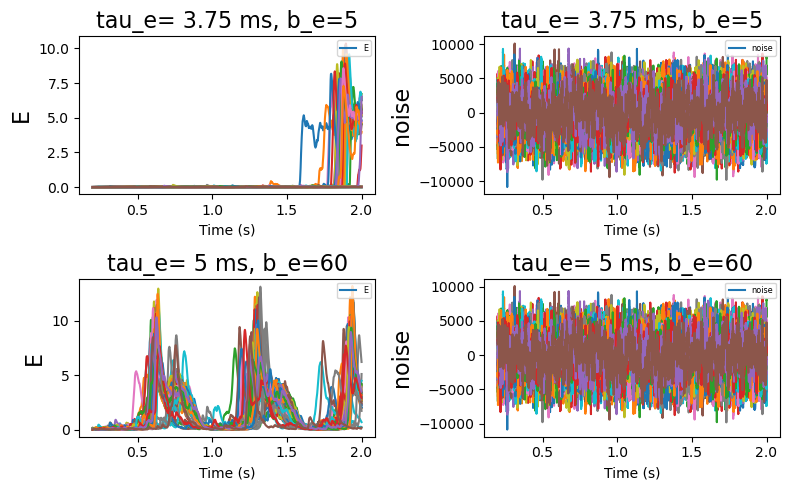

In [ ]:
#Plot the results from TVB Simulations

#which monitor 
monitor = 'Raw'

#which variables
var_select = ['E',  'noise']

#which params (b_e, tau) - to be in the same order as the loading results (see explanations)
params = [[5, 3.75], [60,5]]
plot_tvb_results(parameters,params, result, monitor, for_explan, var_select,cut_transient, run_sim)

<a id="pci"></a>
### Evoked Dynamics and PCI

#### Set up the parameters of the simulation

In [ ]:
## Set the parameters of the simulation:
run_sim = 4000.0 # ms, length of the simulation
cut_transient = 2000.0 # ms, length of the discarded initial segment

# List of values of adaptation strength and tau_e which will vary the brain state
bvals = [5]
tau_es = [3.75]

These are additional parameters to adjust for the stimulation

In [ ]:
## Set the parameters of the stimulus 
stimval = 1e-3 #  stimulus strength in kHz - HERE NO ZERO ANYMORE
t_analysis  = 300. #in ms, for PCI analysis

# Loop over seeds to obtain multi5ple realizations of the model
Nseeds = 2 

# Onset time of the stimulus
stimtime_allseeds = np.random.rand(Nseeds)*(run_sim - cut_transient - 2*t_analysis) + t_analysis + cut_transient # shuffle in ms the start time of stimulus 
stimdur = 50 # ms, duration of the stimulus
stimtime_mean = 2500. # ms, time after simulation start (it will be shufled)
stim_region = 5

#### Run Simulation

In [ ]:
# Choose values of b_e and tau_e
bvals = [5]
tau_es = [3.75]

In [ ]:
# Run Simulation
for b_e, tau_e in zip(bvals, tau_es):
    for seed in range(Nseeds):
        run_simulation_all(parameters, b_e = b_e, tau_e = tau_e,n_nodes=Nnodes,stimval = stimval, nseed=seed,
                       cut_transient=cut_transient, run_sim=run_sim)


#### Calculate PCI

In [ ]:
#Calculate PCI
params = [[5, 3.75, 2], [60, 5, 2]] 

for b_e, tau_e, n_seeds in params:
    calculate_PCI(parameters, n_seeds, run_sim, cut_transient, stimval=stimval, b_e=b_e, tau_e=tau_e, n_trials = 1)

#### Plot PCI #

Loading paper params:
For wake : b_e=5, tau=5.0
For nmda : b_e=30, tau=3.75
For gaba : b_e=30, tau=7.0
For sleep : b_e=120, tau=5.0
Seeds = 60, n_trials=5, stimvals=[1e-05, 0.0001, 0.001]
Creating PCI_all
Creating dataframe


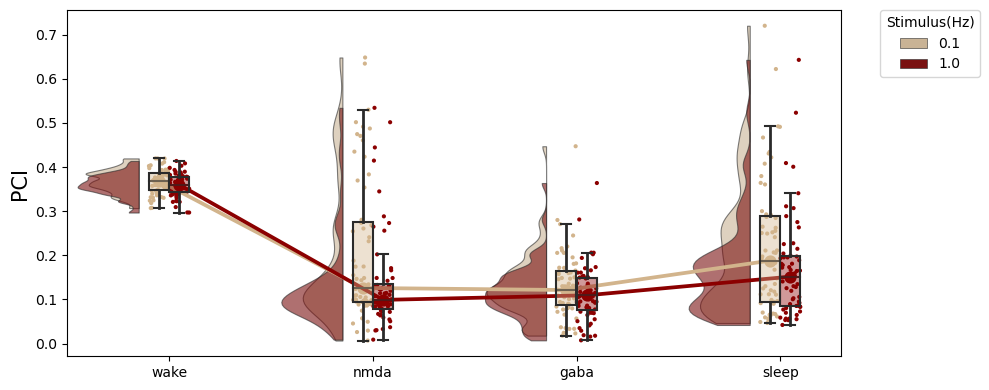

In [ ]:
params = [[5, 3.75, 2], [60, 5, 2]] # b_e, tau, nseeds
conditions = ['nmda', 'sleep'] #conditions that the params describe - used for the x tick labels
stimvals = [1e-3] #stimvals to load
n_trials=1 #how many trials were used for the PCI

pick_stim = [1, 0.1] # stimulus strength to plot

#set this to True if you want to plot the already run stims, it will load params automatically
local_folder= True 


plot_raincloud_with_stats(parameters, params, n_trials=n_trials, stimvals=stimvals, pick_stim=pick_stim, conditions= conditions, local_folder=local_folder)

<a class="anchor" id="bold-and-fc"></a>
### Simulating BOLD signal and calculating FC-SC Correlation

#### Set up the parameters of the simulation

In [ ]:
# Do that to initialize the parameters
parameters.__init__()

In [ ]:
# Choose the connectome

path_windows = r"C:\Users\maria\Downloads\tvb_data\tvb_data\connectivity"
path_linux = "/home/maria/Downloads/tvb_data/connectivity"
parameters.parameter_connection_between_region['from_file'] = True
parameters.parameter_connection_between_region['path'] = path_linux
parameters.parameter_connection_between_region['conn_name'] = 'connectivity_76.zip'

For the BOLD monitor long simulations are needed, so set a long `run_sim`

In [ ]:
## Set the parameters of the simulation:
run_sim = 100000 # ms, length of the simulation
cut_transient = 2000.0 # ms, length of the discarded initial segment

# List of values of adaptation strength and tau_e which will vary the brain state
bvals = [5]
tau_es = [3.75]

## Set the parameters of the stimulus (choose stimval = 0 to simulate spontaneous activity)
stimval = 0 #  stimulus strength

Set `parameter_monitor['Bold'] = True` 
- (if you want you can simulate another monitor)

In [ ]:
#Set Bold Monitor
parameters.parameter_monitor['Bold'] = True
# parameters.parameter_monitor['parameter_Bold']['period'] = 2000 

#Deactivate Raw, and keep Temporal Average instead ( faster )
parameters.parameter_monitor['Raw'] = False
parameters.parameter_monitor['TemporalAverage'] = True
parameters.parameter_monitor['parameter_TemporalAverage']['variables_of_interest'] = [0,1]

In [ ]:
# Choose values of b_e and tau_e
bvals = [5]
tau_es = [3.75]

#### Run Simulation

In [ ]:
# Run sim

#Set a subfolder where the results will be saved, otherwise they can be overwritten 
additional_path_folder='Bold/'

for b_e, tau_e in zip(bvals, tau_es):
    run_simulation_all(parameters, b_e = b_e, tau_e = tau_e,n_nodes=Nnodes,stimval = stimval, nseed=seed,
                cut_transient=cut_transient, run_sim=run_sim,additional_path_folder=additional_path_folder)


#### Load Results

In [ ]:
# Params to load 
bvals = [5]
tau_es = [3.75]

#Which Variables to load
vars_int = ['E' ]

result= []
for i, (b_e, tau_e) in enumerate(zip(bvals, tau_es)):
    result_param, for_explan = get_result(parameters,cut_transient, run_sim, b_e = b_e, tau_e = tau_e, 
    vars_int = vars_int, additional_path_folder=additional_path_folder)
    result.append(result_param)


WARNING    /DATA/Maria/paper_pipeline/functions.py:526: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tmp = np.array(result[i])
 [py.warnings]


Loading:  _b_e_5_tau_e_3.75_tau_i_5.0_Iext_0.000315_El_e_-64.0_El_i_-65.0_nseed_10
monitors: 2
2024-04-04 17:03:56,582 - WARNING - py.warnings - /DATA/Maria/paper_pipeline/functions.py:526: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tmp = np.array(result[i])


Explaining the indices in result:
The result has a length equal to you different parameter combinations, i.e:
result[0]: for b_e = 5 and tau_e= 3.75

The result[i] is a list of arrays, every element of a list corresponds to a monitor:
TemporalAverage monitor : result[i][0]
Bold monitor : result[i][1]

Each monitor contains an array with the selected variables of interest, for all the time points and nodes
For example for TemporalAverage monitor:
For E : result[i][0][0]

These arrays have shape: time_points x 

In [ ]:
# For explanation of the indexes of the result, uncomment the following:
access_results(for_explan, bvals, tau_es, change_of='tau_e')


#### Plot Results


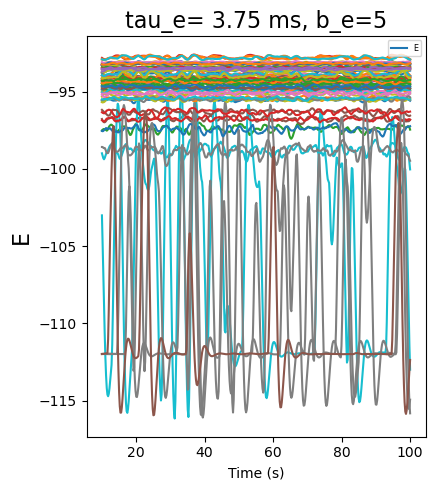

In [ ]:
#Plot the results from TVB Simulations

#which monitor 
monitor = 'Bold'

#which variables to plot
var_select = ['E']

#which params (b_e, tau) - to be in the same order as the loading results (see explanations)
params = [[5, 3.75]]
plot_tvb_results(parameters,params, result, monitor, for_explan, var_select,cut_transient, run_sim, 
                 additional_path_folder=additional_path_folder, desired_time=10)

### Compute Corr FC and SC

450 76


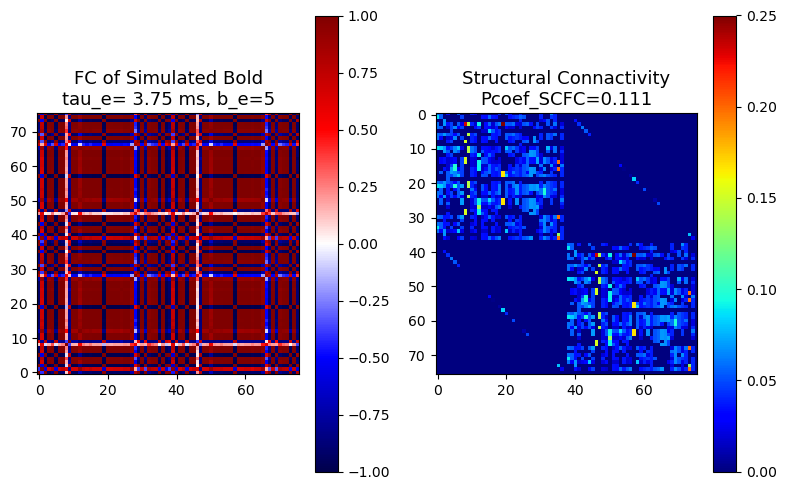

In [ ]:
#Add the SC
SC=simulator.connectivity.weights

plot_FC_SC(parameters,params, result, for_explan, cut_transient, run_sim, SC, 
            additional_path_folder=additional_path_folder,desired_time=10)

<a class="anchor" id="dynamical-analysis"></a>
## Dynamical Analysis (to do)

#### Network Simulations and Survival Time

1. First run network simulations for different values of tau_e/tau_i and b_e
2. Calculate the survival time for each combination of tau/b_e

In [ ]:
%run net_sims_dyn_analysis.py --help

usage: net_sims_dyn_analysis.py [-h] [--b_e_range B_E_RANGE]
                                [--tau_e_range TAU_E_RANGE]
                                [--tau_i_range TAU_I_RANGE] [--nseeds NSEEDS]
                                [--time TIME] [--save_path SAVE_PATH]
                                [--overwrite OVERWRITE]
                                [--surv_time_calc SURV_TIME_CALC]

optional arguments:
  -h, --help            show this help message and exit
  --b_e_range B_E_RANGE
                        b_e range of values (default: 0,30,1)
  --tau_e_range TAU_E_RANGE
                        tau_e range of values - if you iterate tau_i then set
                        tau_e_range=np.arange(5.,10.,step=500) (default:
                        5.,7.,10)
  --tau_i_range TAU_I_RANGE
                        tau_i range of values - if you iterate tau_e then set
                        tau_i_range=np.arange(5.,10.,step=500) (default:
                        3.,9.,0.1)
  --nseeds NSEEDS  

In [232]:
file_path = "./autocor/FS-RS_inh_amp_1.0.npy"

fr_exc= np.load(file_path, allow_pickle=True)[0]

In [187]:
fr_exc

array([0.   , 0.   , 0.   , ..., 5.125, 3.25 , 3.375])

In [142]:
autocorr

0.6268513612287947

In [233]:
fr_exc_1 = fr_exc[1000:1100]

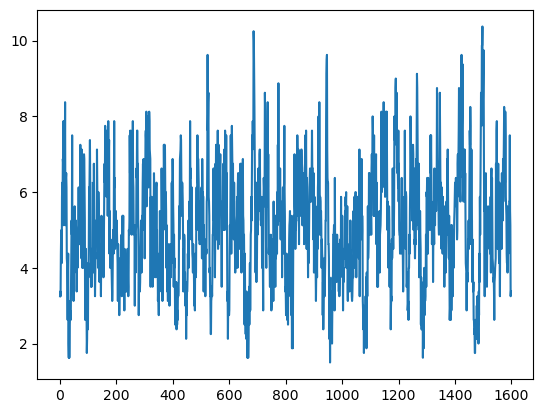

In [231]:
plt.plot(fr_exc[400:])

In [143]:
from statsmodels.graphics.tsaplots import plot_acf


In [194]:
fr_exc_1.shape

(1599,)

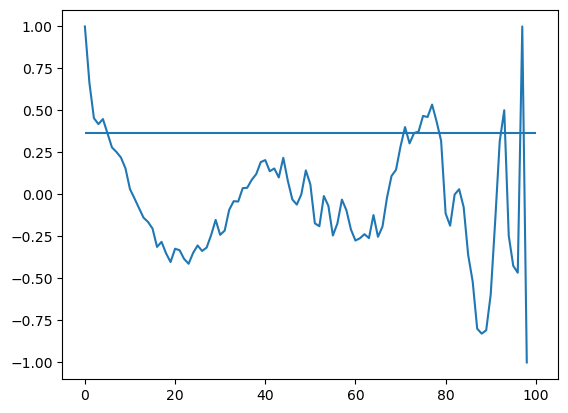

In [234]:
autocorr=[]
signal_series = pd.Series(fr_exc_1)

for i in range(99):
    autocorr.append(signal_series.autocorr(lag=i))

plt.plot(autocorr)
plt.hlines(1/np.e, xmin=0, xmax=100)

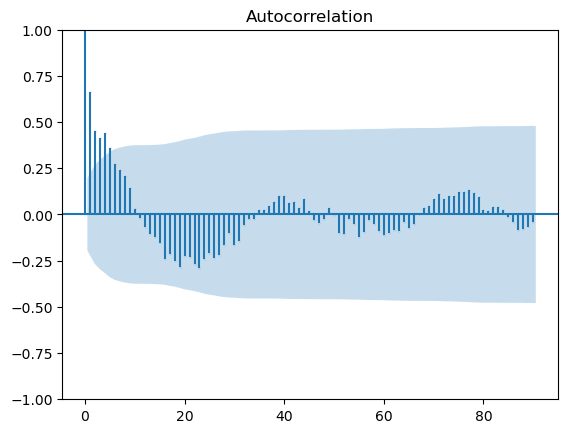

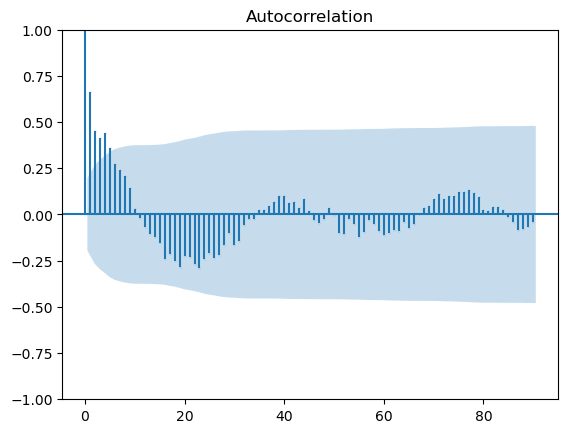

In [235]:
plot_acf((fr_exc_1), lags= 90, markersize=0.1)
# plt.xlim(0,100)


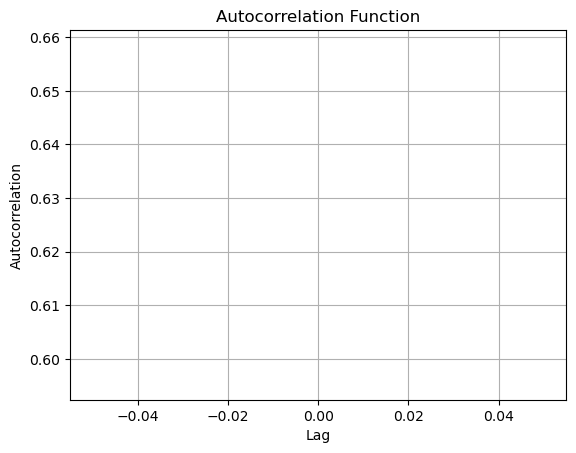

In [141]:
import pandas as pd

# Convert signal to pandas Series
signal_series = pd.Series(fr_inh)
autocorr = signal_series.autocorr()

plt.plot(autocorr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.grid(True)
plt.show()

In [5]:
%run net_sims_dyn_analysis.py --b_e_range '0,30,1' --tau_e_range '2.1, 2.5, 0.1' --tau_i_range '5.0, 5.5, 100' --nseeds '0,100,5' --surv_time_calc True --save_path './fill_gaps_dyn/'

Done! Network simulations are saved in ./fill_gaps_dyn//network_sims/ 
survival time (tau_e_mean_array.npy) 
with the respective values of b_e (tau_e_heatmap_bvals.npy) and 
tau_es (tau_e_heatmap_taus.npy) in ./fill_gaps_dyn/


You can separately calculate the survival times if you have already run the network simulations:
- adjust the parameters accordingly

In [ ]:
bvals = np.arange(0,22,step=2)
tauIv = np.arange(5.,5.5,step=0.2)
tauEv= np.arange(5.,9.,step=10)
Nseeds = np.arange(0,4,2)

if len(tauEv)==1 and len(tauIv)>1:
    tau_i_iter = True
    tau_values = tauIv
elif len(tauEv)>1 and len(tauIv)==1:
    tau_i_iter = False
    tau_values = tauEv

calculate_survival_time(bvals, tau_values, tau_i_iter, Nseeds, save_path ='./trials/')


Done! Saved in : ./trials/


#### Mean Field and b_critical Calculation


In [ ]:
%run calculate_b_crit.py --help

usage: calculate_b_crit.py [-h] [--b_e_range B_E_RANGE]
                           [--tau_e_range TAU_E_RANGE]
                           [--tau_i_range TAU_I_RANGE] [--save_path SAVE_PATH]
                           [--overwrite OVERWRITE]

optional arguments:
  -h, --help            show this help message and exit
  --b_e_range B_E_RANGE
                        b_e range of values (default: [ 0 1 2 3 4 5 6 7 8 9 10
                        11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
                        29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
                        47 48 49 50 51 52 53 54 55 56 57 58 59])
  --tau_e_range TAU_E_RANGE
                        tau_e range of values - if you iterate tau_i then set
                        tau_e_range=np.arange(5.,10.,step=500) (default: [5.])
  --tau_i_range TAU_I_RANGE
                        tau_i range of values - if you iterate tau_e then set
                        tau_i_range=np.arange(5.,10.,step=500) (def

In [ ]:
%run calculate_b_crit.py --tau_i_range '5,7,0.2' --overwrite=True --save_path='./trials/' 

5.0 5.0
crit b =  20
5.2 5.0
crit b =  18
5.4 5.0
crit b =  16
5.6000000000000005 5.0
crit b =  13
5.800000000000001 5.0
crit b =  11
6.000000000000001 5.0
crit b =  9
6.200000000000001 5.0
crit b =  7
6.400000000000001 5.0
crit b =  5
6.600000000000001 5.0
crit b =  3
6.800000000000002 5.0
crit b =  2


### Plot the heatmap

In [238]:
mean_array = np.load('./dynamical_precalc/mean_array_tau_e.npy')
taus = list(np.load('./dynamical_precalc/taues_bcrit.npy'))
bthr = list(np.load('./dynamical_precalc/bthr_taues_bcrit.npy'))

In [242]:
mean_array.shape

(30, 35)

In [241]:
len(taus)

45

In [240]:
#This is an example with few values of tau_i and b_e
load= 'tau_e'
mean_array,taus, bthr, tau_v, bvals = load_survival( load = load, precalc=True)
plot_heatmap_survival(mean_array, taus, tau_v, bvals , bthr,load = load, save_im=False, precalc=True, z_max=200, line_color='grey')

Or you can load directly a pre-calculated array with the mean survival time (averaged over seeds) for each combination of tau/b_e : 

In [ ]:
load= 'tau_e'
mean_array,taus, bthr, tau_v, bvals = load_survival( load = load, precalc=True)
plot_heatmap_survival(mean_array, taus, tau_v, bvals , bthr,load = load, precalc=True, save_im=False, z_max=200, line_color='black', colorscale="jet") 